Code for running experiment where a feature is present in test env but not in train. Also shows that our method scales up to larger grid domains.

In [1]:
%matplotlib notebook
import mdp
import mdp_worlds
import utils
import numpy as np
import random 
import bayesian_irl
import plot_gridworld as pg

In [2]:
#create a train domain

init_seed = 12345
np.random.seed(init_seed)
random.seed(init_seed)

demo_horizon = 100
num_demos = 1


num_rows = 10
num_cols = 10
num_features = 6


train_mdp = mdp_worlds.negative_sideeffects_goal(num_rows, num_cols, num_features, unseen_feature=False)
train_mdp.set_reward_fn(np.array([-.1,-.6,-.1,-0.6,-2,0]))
opt_sa_train = mdp.solve_mdp_lp(train_mdp)
print("===========================")
print("Training MDP with No Lava")
print("===========================")

print("Optimal Policy")
utils.print_policy_from_occupancies(opt_sa_train, train_mdp)
print("reward")
utils.print_as_grid(train_mdp.r_s, train_mdp)
print("features")
utils.display_onehot_state_features(train_mdp)




weights [-0.00823272 -0.28009381 -0.12817793 -0.09993561 -0.66897794  0.66897794]
Training MDP with No Lava
Optimal Policy
v	>	v	>	>	v	v	<	<	v	
v	>	>	>	>	v	v	v	v	<	
>	>	>	>	>	>	.	<	<	<	
^	^	>	>	>	^	^	^	^	^	
>	>	>	>	>	>	^	<	^	^	
>	v	v	>	>	^	^	<	<	v	
>	>	v	v	>	>	^	<	<	v	
>	>	>	v	>	>	^	^	<	<	
>	^	>	>	>	v	^	^	^	<	
^	^	^	^	>	>	>	^	^	^	
reward
-0.10	-0.60	-0.60	-0.60	-0.10	-0.60	-0.10	-0.10	-0.60	-0.10	
-0.60	-0.60	-0.10	-0.60	-0.60	-0.10	-0.60	-0.60	-0.60	-0.10	
-0.10	-0.10	-0.60	-0.60	-0.60	-0.10	0.00	-0.10	-0.10	-0.60	
-0.60	-0.60	-0.60	-0.60	-0.10	-0.60	-0.60	-0.60	-0.60	-0.60	
-0.60	-0.10	-0.10	-0.60	-0.60	-0.10	-0.10	-0.60	-0.60	-0.60	
-0.60	-0.10	-0.60	-0.60	-0.60	-0.60	-0.10	-0.60	-0.60	-0.10	
-0.60	-0.10	-0.10	-0.60	-0.60	-0.60	-0.10	-0.10	-0.60	-0.10	
-0.60	-0.10	-0.10	-0.10	-0.60	-0.60	-0.10	-0.10	-0.10	-0.10	
-0.10	-0.10	-0.60	-0.10	-0.10	-0.10	-0.60	-0.10	-0.10	-0.60	
-0.60	-0.60	-0.60	-0.60	-0.60	-0.10	-0.10	-0.10	-0.60	-0.10	
features
2 	1 	1 	1 	0 	1 	2 	2 	1 	2 	
1 	1 	2 	1 

demo 0 [(0, 3), (10, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, None)]
demo 0 [(9, 3), (19, 0), (18, 3), (28, 0), (27, 0), (26, None)]
demo 0 [(90, 2), (80, 1), (81, 2), (71, 1), (72, 1), (73, 3), (83, 1), (84, 1), (85, 3), (95, 1), (96, 1), (97, 2), (87, 2), (77, 0), (76, 2), (66, 2), (56, 2), (46, 2), (36, 2), (26, None)]
demo 0 [(99, 2), (89, 0), (88, 0), (87, 2), (77, 0), (76, 2), (66, 2), (56, 2), (46, 2), (36, 2), (26, None)]
demonstration
[(97, 2), (71, 1), (73, 3), (84, 1), (25, 1), (19, 0), (0, 3), (66, 2), (10, 3), (99, 2), (26, None), (21, 1), (85, 3), (80, 1), (24, 1), (83, 1), (77, 0), (96, 1), (9, 3), (20, 1), (90, 2), (23, 1), (88, 0), (95, 1), (27, 0), (76, 2), (18, 3), (72, 1), (87, 2), (81, 2), (89, 0), (56, 2), (28, 0), (36, 2), (22, 1), (46, 2)]


<IPython.core.display.Javascript object>


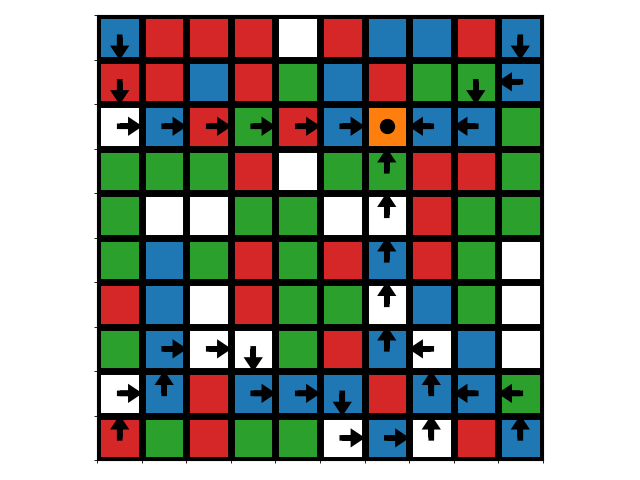

[[3, 2, 2, 2, 1, 2, 3, 3, 2, 3], [2, 2, 3, 2, 4, 3, 2, 4, 4, 3], [1, 3, 2, 4, 2, 3, 6, 3, 3, 4], [4, 4, 4, 2, 1, 4, 4, 2, 2, 4], [4, 1, 1, 4, 4, 1, 1, 2, 4, 4], [4, 3, 4, 2, 4, 2, 3, 2, 4, 1], [2, 3, 1, 2, 4, 4, 1, 3, 4, 1], [4, 3, 1, 1, 4, 2, 3, 1, 3, 1], [1, 3, 2, 3, 3, 3, 2, 3, 3, 4], [2, 4, 2, 4, 4, 1, 3, 1, 2, 3]]


In [3]:
init_demo_states = [0,9,90,99]#mdp_env.num_cols * (mdp_env.num_rows - 1)
traj_demonstrations = []
demo_set = set()
for d in range(num_demos):
    # np.random.seed(init_seed + d)
    # random.seed(init_seed + d)
    for s in init_demo_states:
        #s = init_demo_state #mdp_env.init_states[0] # only one initial state
        demo = utils.rollout_from_usa(s, demo_horizon, opt_sa_train, train_mdp)
        print("demo", d, demo)
        traj_demonstrations.append(demo)
        for s_a in demo:
            demo_set.add(s_a)
demonstrations = list(demo_set)
print("demonstration")
print(demonstrations)

state_feature_list = [tuple(fs) for fs in train_mdp.state_features]
#pg.get_policy_string_from_trajectory(traj_demonstrations[0], state_feature_list, train_mdp, filename="./figs/negative_sideeffects/demo.pdf")
pg.get_policy_string_from_trajectory(demo_set, state_feature_list, train_mdp, filename="./figs/negative_sideeffects/demo.pdf")

1
w_map [-0.80245856 -0.79151792 -0.6582622  -0.80291261 -1.         -0.63931964] loglik = -51.0732
2
w_map [-0.74757551 -0.72752613 -0.53151236 -0.92055161 -1.         -0.57111101] loglik = -45.9890
3
w_map [-0.68270815 -0.84475391 -0.5149004  -0.93595007 -1.         -0.56140718] loglik = -37.5712
7
w_map [-0.602949   -0.78663098 -0.47226386 -0.91591478 -0.70545683 -0.44594635] loglik = -33.9406
9
w_map [-0.70663987 -0.98152958 -0.39376525 -0.83601518 -0.67737619 -0.44038588] loglik = -33.1759
15
w_map [-0.5927541  -1.         -0.50835284 -0.8600635  -0.77274078 -0.39311641] loglik = -30.3793
16
w_map [-0.5959802  -0.97108631 -0.39547632 -0.87515031 -0.64886113 -0.49413079] loglik = -27.1026
24
w_map [-0.52256111 -0.79707534 -0.31710027 -0.68930954 -0.52232641 -0.67290988] loglik = -25.6179
30
w_map [-0.45769691 -0.83094716 -0.29372722 -0.58938296 -0.50173592 -0.70470768] loglik = -23.7973
32
w_map [-0.4609398  -0.90146335 -0.23932514 -0.56790653 -0.53877139 -0.70675559] loglik = -23.

<IPython.core.display.Javascript object>


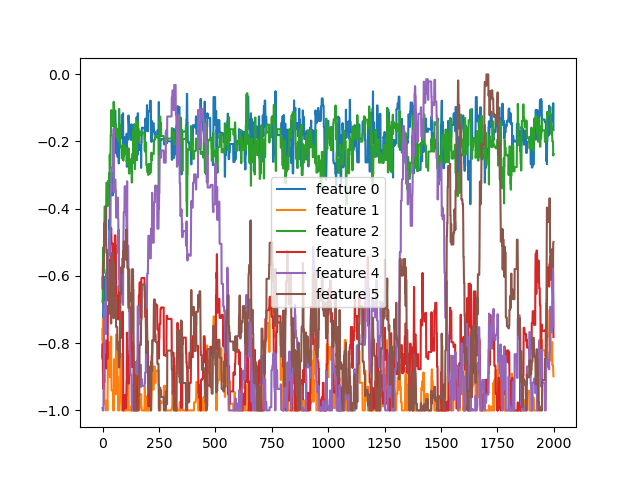

In [4]:
#Now let's run Bayesian IRL on this demo in this mdp with a placeholder feature to see what happens.
beta = 10.0
step_stdev = 0.075

num_samples = 2000
mcmc_norm = "inf"
likelihood = "birl"


birl = bayesian_irl.BayesianIRL(train_mdp, beta, step_stdev, debug=False, mcmc_norm=mcmc_norm, likelihood=likelihood, prior="non-pos")

map_w, map_u, r_chain, u_chain = birl.sample_posterior(demonstrations, num_samples, True)
print(r_chain)
import matplotlib.pyplot as plt
plt.figure()
for w in range(len(r_chain[0])):
    plt.plot(r_chain[:,w],label="feature {}".format(w))
plt.legend()
plt.show()

In [5]:
print(train_mdp.feature_weights)

[-0.1 -0.6 -0.1 -0.6 -2.   0. ]


In [6]:
burn = 100
skip = 10
r_chain_burned = r_chain[burn::skip]

u_expert = utils.u_sa_from_demos(traj_demonstrations, train_mdp)
expert_returns = np.sort(np.dot(r_chain_burned, u_expert))


#get the r_sa matrix from the posterior 
Rsa = utils.convert_w_to_rsa(r_chain_burned, train_mdp)

In [7]:
print(r_chain_burned.shape)

(190, 6)


In [8]:
#create test MDP
num_rows = 10
num_cols = 10
num_features = 6

init_seed = 12345
np.random.seed(init_seed)
random.seed(init_seed)

test_mdp = mdp_worlds.negative_sideeffects_goal(num_rows, num_cols, num_features, unseen_feature=True)
opt_sa_test = mdp.solve_mdp_lp(test_mdp)
print("===========================")
print("Testing MDP with Lava")
print("===========================")

print("Optimal Policy")
utils.print_policy_from_occupancies(opt_sa_test, test_mdp)
print("reward")
utils.print_as_grid(test_mdp.r_s, test_mdp)
print("features")
utils.display_onehot_state_features(test_mdp)

weights [-0.177717   -0.08415138 -0.24025075 -0.12246093 -0.66656512  0.66656512]
Testing MDP with Lava
Optimal Policy
>	v	v	v	>	>	>	v	v	v	
v	>	v	v	<	>	v	v	v	v	
v	v	v	v	<	>	>	>	v	<	
>	v	v	v	v	v	^	v	v	<	
>	>	v	v	v	v	v	v	<	<	
>	>	v	>	v	v	v	v	v	^	
>	>	v	v	v	v	>	v	v	<	
v	>	>	v	v	v	>	v	<	<	
v	v	>	>	v	v	v	v	<	<	
>	>	>	>	>	>	.	<	<	<	
reward
-0.24	-0.08	-0.67	-0.08	-0.24	-0.08	-0.08	-0.12	-0.08	-0.12	
-0.18	-0.24	-0.08	-0.12	-0.24	-0.08	-0.24	-0.12	-0.18	-0.08	
-0.12	-0.67	-0.18	-0.12	-0.67	-0.67	-0.12	-0.12	-0.08	-0.12	
-0.24	-0.12	-0.18	-0.24	-0.67	-0.12	-0.12	-0.67	-0.12	-0.18	
-0.12	-0.18	-0.18	-0.12	-0.24	-0.67	-0.67	-0.18	-0.08	-0.24	
-0.24	-0.24	-0.08	-0.24	-0.08	-0.12	-0.18	-0.24	-0.67	-0.08	
-0.24	-0.12	-0.12	-0.18	-0.12	-0.18	-0.24	-0.08	-0.12	-0.67	
-0.67	-0.18	-0.12	-0.08	-0.18	-0.12	-0.18	-0.24	-0.08	-0.67	
-0.08	-0.24	-0.67	-0.18	-0.12	-0.24	-0.67	-0.08	-0.67	-0.08	
-0.08	-0.12	-0.18	-0.18	-0.18	-0.24	0.67	-0.18	-0.67	-0.24	
features
2 	1 	4 	1 	2 	1 	1 	3 	1 	3 	
0 	2 	1 	3 	2 	

MAP on testing env
map_weights [-0.17925375 -1.         -0.21215622 -0.82421516 -0.71180862 -0.04950537]
map reward
-0.21	-1.00	-0.71	-1.00	-0.21	-1.00	-1.00	-0.82	-1.00	-0.82	
-0.18	-0.21	-1.00	-0.82	-0.21	-1.00	-0.21	-0.82	-0.18	-1.00	
-0.82	-0.71	-0.18	-0.82	-0.71	-0.71	-0.82	-0.82	-1.00	-0.82	
-0.21	-0.82	-0.18	-0.21	-0.71	-0.82	-0.82	-0.71	-0.82	-0.18	
-0.82	-0.18	-0.18	-0.82	-0.21	-0.71	-0.71	-0.18	-1.00	-0.21	
-0.21	-0.21	-1.00	-0.21	-1.00	-0.82	-0.18	-0.21	-0.71	-1.00	
-0.21	-0.82	-0.82	-0.18	-0.82	-0.18	-0.21	-1.00	-0.82	-0.71	
-0.71	-0.18	-0.82	-1.00	-0.18	-0.82	-0.18	-0.21	-1.00	-0.71	
-1.00	-0.21	-0.71	-0.18	-0.82	-0.21	-0.71	-1.00	-0.71	-1.00	
-1.00	-0.82	-0.18	-0.18	-0.18	-0.21	-0.05	-0.18	-0.71	-0.21	
Map policy
v	v	v	>	v	<	v	v	v	v	
>	v	v	v	v	>	v	v	<	v	
v	>	v	v	v	v	v	v	v	v	
v	v	v	v	v	v	v	v	<	v	
v	v	>	v	>	>	v	v	<	<	
v	v	>	v	>	v	v	<	<	<	
v	v	>	v	>	>	v	v	<	v	
>	v	v	v	v	v	v	<	<	<	
>	>	v	v	v	v	v	v	v	v	
>	>	>	>	>	>	.	<	<	<	


<IPython.core.display.Javascript object>


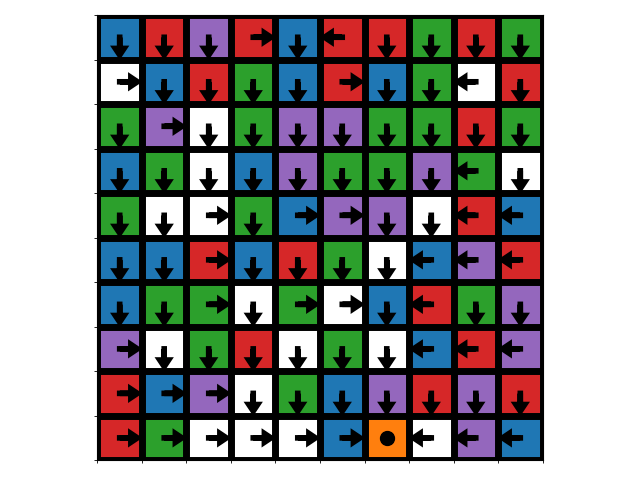

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]


In [9]:
#what does the MAP policy do?
print("MAP on testing env")
print("map_weights", map_w)
map_r = np.dot(test_mdp.state_features, map_w)
print("map reward")
utils.print_as_grid(map_r, test_mdp)
#compute new policy for mdp_B for map rewards
map_r_sa = test_mdp.transform_to_R_sa(map_w)
map_u_sa = mdp.solve_mdp_lp(test_mdp, reward_sa=map_r_sa) #use optional argument to replace standard rewards with sample
print("Map policy")
utils.print_policy_from_occupancies(map_u_sa, test_mdp)
state_feature_list = [tuple(fs) for fs in test_mdp.state_features]

#get MAP policy as (s,a) pairs
init_demo_states = [i for i in range(test_mdp.num_states)]
map_policy_sa = set()
horizon = 100
for s in init_demo_states:
    #s = init_demo_state #mdp_env.init_states[0] # only one initial state
    demo = utils.rollout_from_usa(s, horizon, map_u_sa, test_mdp)
    #print("demo", d, demo)
    for s_a in demo:
        map_policy_sa.add(s_a)


#pg.get_policy_string_from_trajectory(traj_demonstrations[0], state_feature_list, train_mdp, filename="./figs/negative_sideeffects/demo.pdf")
pg.get_policy_string_from_trajectory(map_policy_sa, state_feature_list, test_mdp, filename="./figs/negative_sideeffects/map_test.pdf")


Mean on testing env
mean_weights [-0.18573175 -0.94485104 -0.20936086 -0.8400391  -0.71267422 -0.76036718]
mean reward
-0.21	-0.94	-0.71	-0.94	-0.21	-0.94	-0.94	-0.84	-0.94	-0.84	
-0.19	-0.21	-0.94	-0.84	-0.21	-0.94	-0.21	-0.84	-0.19	-0.94	
-0.84	-0.71	-0.19	-0.84	-0.71	-0.71	-0.84	-0.84	-0.94	-0.84	
-0.21	-0.84	-0.19	-0.21	-0.71	-0.84	-0.84	-0.71	-0.84	-0.19	
-0.84	-0.19	-0.19	-0.84	-0.21	-0.71	-0.71	-0.19	-0.94	-0.21	
-0.21	-0.21	-0.94	-0.21	-0.94	-0.84	-0.19	-0.21	-0.71	-0.94	
-0.21	-0.84	-0.84	-0.19	-0.84	-0.19	-0.21	-0.94	-0.84	-0.71	
-0.71	-0.19	-0.84	-0.94	-0.19	-0.84	-0.19	-0.21	-0.94	-0.71	
-0.94	-0.21	-0.71	-0.19	-0.84	-0.21	-0.71	-0.94	-0.71	-0.94	
-0.94	-0.84	-0.19	-0.19	-0.19	-0.21	-0.76	-0.19	-0.71	-0.21	
mean policy
v	v	v	>	v	<	v	v	v	v	
>	v	v	v	v	>	v	v	<	v	
v	>	v	v	v	v	v	v	v	v	
v	v	v	v	v	v	v	v	<	v	
v	v	>	v	>	>	v	v	<	<	
v	v	>	v	<	v	v	<	<	<	
v	v	>	v	>	>	v	v	<	v	
>	v	v	v	v	v	v	<	<	<	
>	>	v	v	v	v	v	v	v	v	
>	>	>	>	>	>	.	<	<	<	


<IPython.core.display.Javascript object>


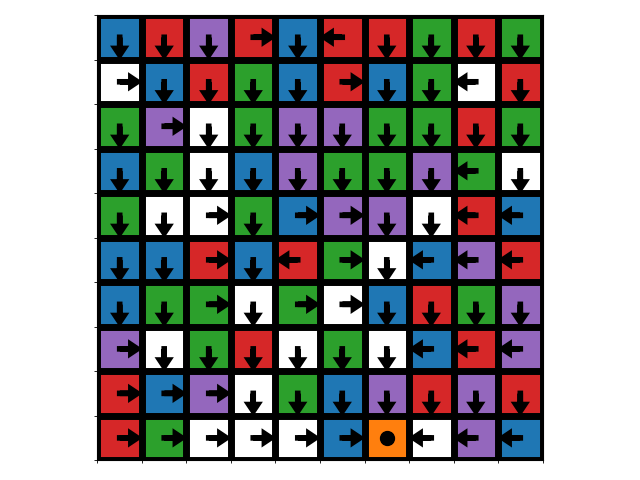

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]
demo 0 [(4, 3), (14, 3), (24, 3), (34, 3), (44, 1), (45, 1), (46, 3), (56, 3), (66, 3), (76, 3), (86, 3), (96, None)]


<IPython.core.display.Javascript object>


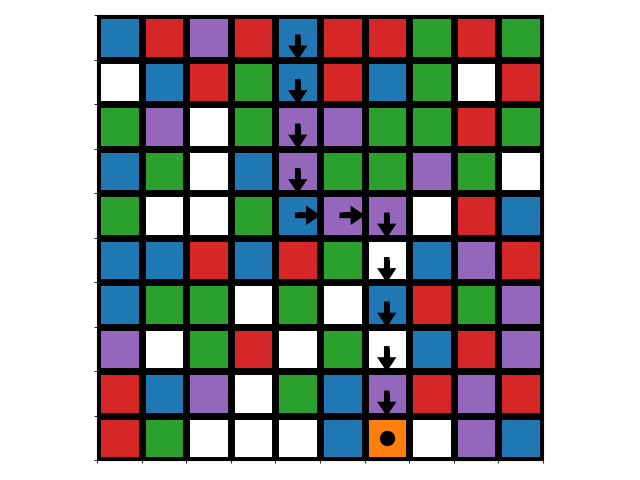

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]


In [10]:
#what does the Mean policy do?
print("Mean on testing env")
mean_w = np.mean(r_chain_burned, axis=0)
print("mean_weights", mean_w)
mean_r = np.dot(test_mdp.state_features, mean_w)
mean_r_sa = test_mdp.transform_to_R_sa(mean_w)
mean_u_sa = mdp.solve_mdp_lp(test_mdp, reward_sa=mean_r_sa) #use optional argument to replace standard rewards with sample
print('mean reward')
utils.print_as_grid(mean_r, test_mdp)
print("mean policy")
utils.print_policy_from_occupancies(mean_u_sa, test_mdp)

state_feature_list = [tuple(fs) for fs in test_mdp.state_features]

#get mean policy as (s,a) pairs
init_demo_states = [i for i in range(test_mdp.num_states)]
mean_policy_sa = set()
horizon = 100
for s in init_demo_states:
    #s = init_demo_state #mdp_env.init_states[0] # only one initial state
    demo = utils.rollout_from_usa(s, horizon, mean_u_sa, test_mdp)
    #print("demo", d, demo)
    for s_a in demo:
        mean_policy_sa.add(s_a)



pg.get_policy_string_from_trajectory(mean_policy_sa, state_feature_list, test_mdp, filename="./figs/negative_sideeffects/mean_test.pdf")
init_demo_states = [4]#mdp_env.num_cols * (mdp_env.num_rows - 1)
traj_demonstrations = []
demo_set = set()
for d in range(num_demos):
    # np.random.seed(init_seed + d)
    # random.seed(init_seed + d)
    for s in init_demo_states:
        #s = init_demo_state #mdp_env.init_states[0] # only one initial state
        demo = utils.rollout_from_usa(s, demo_horizon, mean_u_sa, test_mdp)
        print("demo", d, demo)
        traj_demonstrations.append(demo)
        for s_a in demo:
            demo_set.add(s_a)
pg.get_policy_string_from_trajectory(demo_set, state_feature_list, test_mdp, filename="./figs/negative_sideeffects/mean_traj.pdf")


ALPHA 0.95 LAMBDA 0
------ Regret Solution ---------
u expert [ 7.72671746  3.31995067 15.37042607  3.03720192  0.          0.90438208]
Policy for lambda=0 and alpha=0.95
v	v	v	v	v	<	v	v	v	v	
>	>	v	v	<	>	v	v	<	v	
v	>	v	v	<	v	v	v	v	v	
v	v	>	v	v	v	v	v	v	v	
v	v	>	v	<	v	v	v	<	<	
v	v	>	v	<	v	v	<	<	<	
>	v	>	v	v	v	v	v	<	<	
>	v	>	v	v	v	v	v	<	<	
>	v	v	v	>	v	v	v	<	v	
>	>	>	>	>	>	.	<	<	<	


<IPython.core.display.Javascript object>


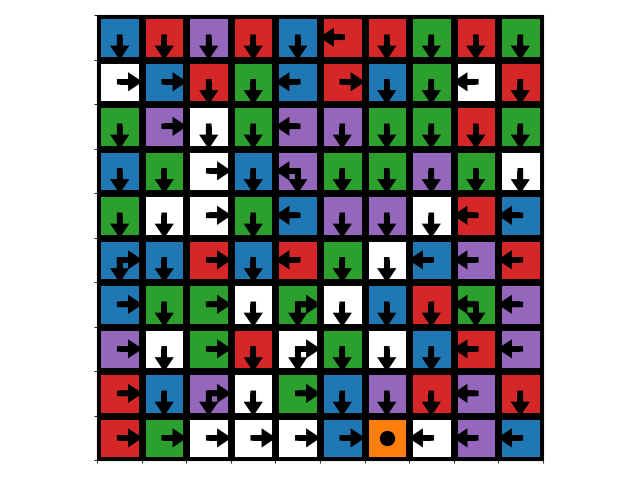

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]
demo 0 [(4, 3), (14, 0), (13, 3), (23, 3), (33, 3), (43, 3), (53, 3), (63, 3), (73, 3), (83, 3), (93, 1), (94, 1), (95, 1), (96, None)]


<IPython.core.display.Javascript object>


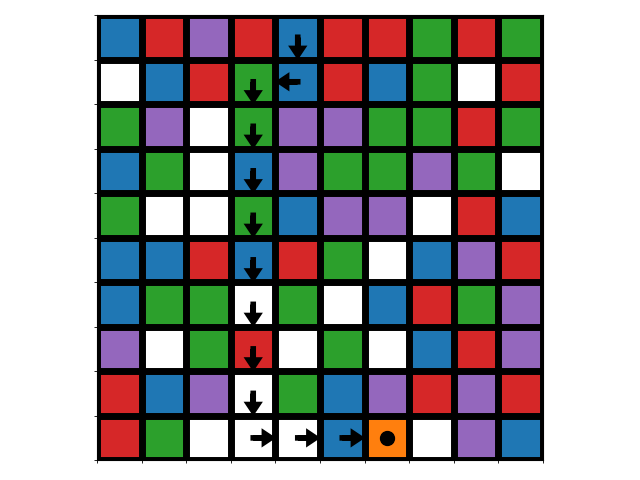

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]

ALPHA 0.95 LAMBDA 0.75
------ Regret Solution ---------
u expert [ 7.72671746  3.31995067 15.37042607  3.03720192  0.          0.90438208]
Policy for lambda=0.75 and alpha=0.95
v	v	v	v	v	>	v	v	v	v	
>	v	v	v	v	>	v	v	<	v	
v	>	v	v	v	v	v	v	v	v	
v	v	v	v	v	v	v	v	<	v	
v	v	>	v	<	>	v	v	<	<	
v	v	>	v	<	v	v	<	<	<	
v	v	>	v	>	>	v	v	<	v	
>	v	v	v	v	v	v	<	<	<	
>	>	v	v	v	v	v	v	v	v	
>	>	>	>	>	>	.	<	<	<	


<IPython.core.display.Javascript object>


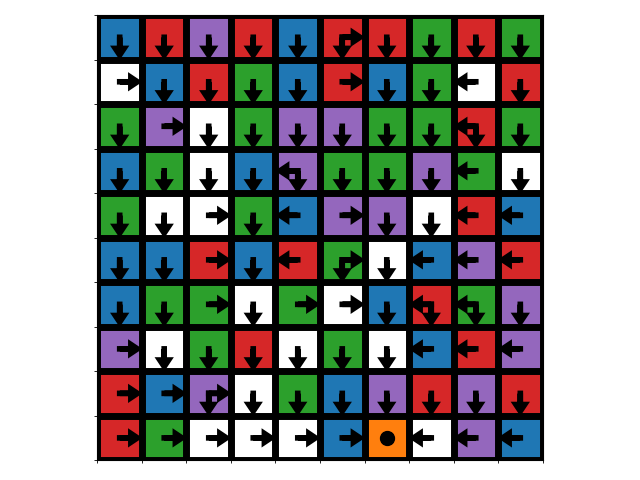

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]
demo 0 [(4, 3), (14, 3), (24, 3), (34, 0), (33, 3), (43, 3), (53, 3), (63, 3), (73, 3), (83, 3), (93, 1), (94, 1), (95, 1), (96, None)]


<IPython.core.display.Javascript object>


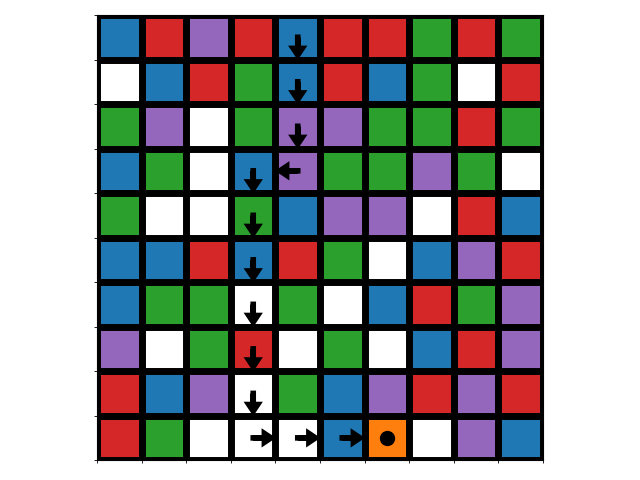

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]

ALPHA 0.95 LAMBDA 0.95
------ Regret Solution ---------
u expert [ 7.72671746  3.31995067 15.37042607  3.03720192  0.          0.90438208]
Policy for lambda=0.95 and alpha=0.95
v	v	v	>	v	<	v	v	v	v	
>	v	v	v	v	>	v	v	<	v	
v	>	v	v	v	v	v	v	v	v	
v	v	v	v	v	v	v	v	<	v	
v	v	>	v	>	>	v	v	<	<	
v	v	>	v	<	v	v	<	<	<	
v	v	>	v	>	>	v	v	<	v	
>	v	v	v	v	v	v	<	<	<	
>	>	v	v	v	v	v	v	v	v	
>	>	>	>	>	>	.	<	<	<	


<IPython.core.display.Javascript object>


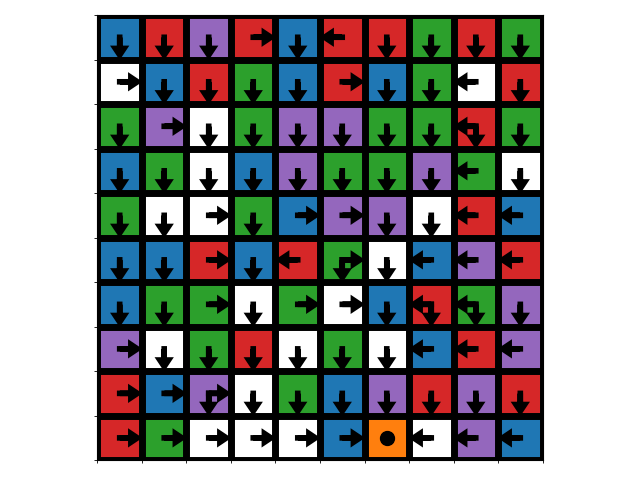

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]
demo 0 [(4, 3), (14, 3), (24, 3), (34, 3), (44, 1), (45, 1), (46, 3), (56, 3), (66, 3), (76, 3), (86, 3), (96, None)]


<IPython.core.display.Javascript object>


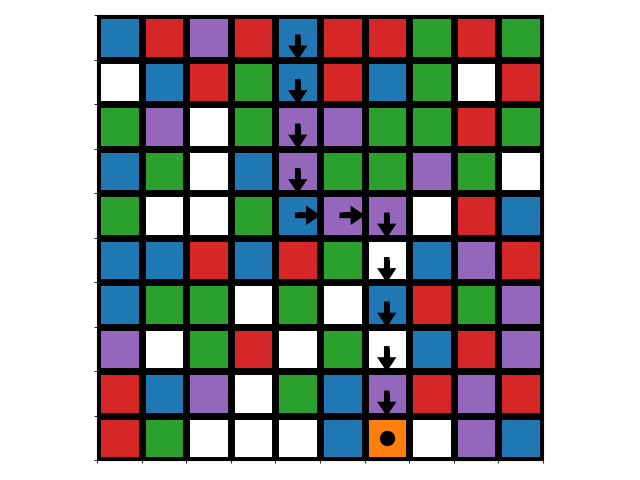

[[3, 2, 5, 2, 3, 2, 2, 4, 2, 4], [1, 3, 2, 4, 3, 2, 3, 4, 1, 2], [4, 5, 1, 4, 5, 5, 4, 4, 2, 4], [3, 4, 1, 3, 5, 4, 4, 5, 4, 1], [4, 1, 1, 4, 3, 5, 5, 1, 2, 3], [3, 3, 2, 3, 2, 4, 1, 3, 5, 2], [3, 4, 4, 1, 4, 1, 3, 2, 4, 5], [5, 1, 4, 2, 1, 4, 1, 3, 2, 5], [2, 3, 5, 1, 4, 3, 5, 2, 5, 2], [2, 4, 1, 1, 1, 3, 6, 1, 5, 3]]


In [11]:
#what does the BROIL policy do?
#Now let's see what CVaR optimization does.
lambdas = [0,0.75,0.95]
alpha = 0.95
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
#     print("------ Robust Solution ---------")
#     u_expert = np.zeros(test_mdp.num_actions * test_mdp.num_states)
#     robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(test_mdp, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
#     #utils.print_stochastic_policy_action_probs(cvar_opt_usa, test_mdp_A)
#     print("Policy for lambda={} and alpha={}".format(lamda, alpha))
#     utils.print_policy_from_occupancies(robust_opt_usa, test_mdp)

# #     robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))


#     pi = utils.get_policy_string_from_occupancies(robust_opt_usa, test_mdp)
#     state_feature_list = [tuple(fs) for fs in test_mdp.state_features]
#     pg.plot_optimal_policy_lists(pi, state_feature_list, test_mdp.num_rows, test_mdp.num_cols, "./figs/negative_sideeffects/robust_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")
    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, train_mdp)
    print("u expert", u_expert)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(test_mdp, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, test_mdp_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(regret_opt_usa, test_mdp)

#     regret_returns = np.sort(np.dot(Rsa, regret_opt_usa))

    pi = utils.get_policy_string_from_occupancies(regret_opt_usa, test_mdp)
    state_feature_list = [tuple(fs) for fs in test_mdp.state_features]
    pg.plot_optimal_policy_lists(pi, state_feature_list, test_mdp.num_rows, test_mdp.num_cols, "./figs/negative_sideeffects/regret_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")
    #regret_traj = utils.rollout_from_usa(4, demo_horizon, regret_opt_usa, test_mdp)
    #pg.get_policy_string_from_trajectory(regret_traj, state_feature_list, test_mdp, filename="./figs/negative_sideeffects/regret_traj.pdf")
    init_demo_states = [4]#mdp_env.num_cols * (mdp_env.num_rows - 1)
    traj_demonstrations = []
    demo_set = set()
    for d in range(num_demos):
        # np.random.seed(init_seed + d)
        # random.seed(init_seed + d)
        for s in init_demo_states:
            #s = init_demo_state #mdp_env.init_states[0] # only one initial state
            demo = utils.rollout_from_usa(s, demo_horizon, regret_opt_usa, test_mdp)
            print("demo", d, demo)
            traj_demonstrations.append(demo)
            for s_a in demo:
                demo_set.add(s_a)
    pg.get_policy_string_from_trajectory(demo_set, state_feature_list, test_mdp, filename="./figs/negative_sideeffects/regret_traj_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")

In [12]:
#create test MDP
num_rows = 60
num_cols = 60
num_features = 6

init_seed = 12345
np.random.seed(init_seed)
random.seed(init_seed)

test_mdp = mdp_worlds.negative_sideeffects_goal(num_rows, num_cols, num_features, unseen_feature=True)
opt_sa_test = mdp.solve_mdp_lp(test_mdp)
print("===========================")
print("Testing MDP with Lava")
print("===========================")

print("Optimal Policy")
utils.print_policy_from_occupancies(opt_sa_test, test_mdp)
print("reward")
utils.print_as_grid(test_mdp.r_s, test_mdp)
print("features")
utils.display_onehot_state_features(test_mdp)

weights [-0.07334546 -0.10153954 -0.12218199 -0.13505634 -0.68961638  0.68961638]
Testing MDP with Lava
Optimal Policy
v	v	>	v	>	v	v	v	>	>	>	v	<	v	v	>	v	>	v	<	v	>	>	v	v	v	>	v	>	v	v	<	v	<	v	v	v	v	>	v	v	v	<	<	<	v	>	>	>	v	v	<	<	v	>	>	v	v	v	v	
v	v	>	v	>	>	v	v	<	^	>	v	<	>	>	>	>	>	v	v	>	v	>	v	v	v	v	v	v	>	v	<	<	<	<	<	>	v	>	>	v	v	v	<	v	v	v	^	v	v	<	<	>	v	>	>	v	v	v	<	
>	>	v	v	<	v	v	v	v	>	>	v	v	>	v	>	>	>	>	v	>	>	>	>	v	v	v	v	v	v	v	<	^	^	v	<	v	v	>	v	v	v	v	v	v	v	v	>	v	v	v	<	v	v	>	>	v	v	<	<	
v	>	>	v	>	v	v	v	v	>	v	v	<	>	>	>	>	>	>	v	<	>	>	>	v	v	v	>	>	v	v	<	^	v	v	v	v	v	v	>	>	v	<	>	>	v	v	>	>	v	v	v	v	<	v	>	v	v	<	<	
>	>	>	>	>	>	>	v	v	v	v	v	v	<	>	v	>	v	>	v	v	>	>	>	v	v	v	>	>	v	v	v	>	v	v	>	>	>	>	v	v	v	v	>	>	>	v	v	>	v	<	v	<	v	v	v	v	<	<	v	
>	>	^	>	^	>	>	>	>	>	v	v	v	v	>	v	v	v	v	v	<	>	>	>	>	v	v	v	>	>	>	v	<	v	v	v	>	v	>	>	v	v	<	<	^	v	v	v	v	v	<	v	v	v	<	<	<	<	>	v	
>	v	v	v	>	>	>	^	^	>	>	>	v	v	v	v	>	v	v	v	v	v	^	^	>	v	>	v	v	^	v	v	<	>	v	v	v	v	v	>	v	v	<	<	>	v	>	v	>	v	v	>	v	v	v	v	v	<	<	v	
v	v	v	v	>	v	v	>	v	v	v	>	>	>	>	v	v	

In [13]:
#what does the BROIL policy do?
#Now let's see what CVaR optimization does.t = time.time()
# do stuff
import time
t = time.time()

lambdas = [0]
alpha = 0.99
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
#     print("------ Robust Solution ---------")
#     u_expert = np.zeros(test_mdp.num_actions * test_mdp.num_states)
#     robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(test_mdp, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
#     #utils.print_stochastic_policy_action_probs(cvar_opt_usa, test_mdp_A)
#     print("Policy for lambda={} and alpha={}".format(lamda, alpha))
#     utils.print_policy_from_occupancies(robust_opt_usa, test_mdp)

# #     robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))


#     pi = utils.get_policy_string_from_occupancies(robust_opt_usa, test_mdp)
#     state_feature_list = [tuple(fs) for fs in test_mdp.state_features]
#     pg.plot_optimal_policy_lists(pi, state_feature_list, test_mdp.num_rows, test_mdp.num_cols, "./figs/negative_sideeffects/robust_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")
    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, train_mdp)
    print("u expert", u_expert)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(test_mdp, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, test_mdp_A)
    elapsed = time.time() - t
    print(elapsed)
    print("done")
#     


ALPHA 0.99 LAMBDA 0
------ Regret Solution ---------
u expert [ 7.72671746  3.31995067 15.37042607  3.03720192  0.          0.90438208]
127.48142457008362
done


In [ ]:
print("MAP")
print("map_weights", map_w)
map_r = np.dot(mdp_env.state_features, map_w)
print("map reward")
utils.print_as_grid(map_r, mdp_env)
print("Map policy")
utils.print_policy_from_occupancies(map_u, mdp_env)
map_returns = np.sort(np.dot(Rsa, map_u))


print("MEAN")
mean_w = np.mean(r_chain_burned, axis=0)
print("mean_weights", mean_w)
mean_r = np.dot(mdp_env.state_features, mean_w)
mean_r_sa = mdp_env.transform_to_R_sa(mean_w)
mean_u_sa = mdp.solve_mdp_lp(mdp_env, reward_sa=mean_r_sa) #use optional argument to replace standard rewards with sample
print('mean reward')
utils.print_as_grid(mean_r, mdp_env)
print("mean policy")
utils.print_policy_from_occupancies(mean_u_sa, mdp_env)

pi = utils.get_policy_string_from_occupancies(mean_u_sa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/mean.pdf")
    

mean_returns = np.sort(np.dot(Rsa, mean_u_sa))

In [ ]:
#Now let's see what CVaR optimization does.
lambdas = [0., 0.1, 0.3, 0.5, 0.8, 1.0]
alpha = 0.95
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
    print("------ Robust Solution ---------")
    u_expert = np.zeros(mdp_env.num_actions * mdp_env.num_states)
    robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(robust_opt_usa, mdp_env)

#     robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))


    pi = utils.get_policy_string_from_occupancies(robust_opt_usa, mdp_env)
    state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/robust_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")
    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(regret_opt_usa, mdp_env)

#     regret_returns = np.sort(np.dot(Rsa, regret_opt_usa))

    pi = utils.get_policy_string_from_occupancies(regret_opt_usa, mdp_env)
    state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
    pg.plot_optimal_policy_lists(pi, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/regret_alpha" + str(alpha) + "lambda" + str(lamda) + ".pdf")

In [ ]:
#LPAL solution
u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
lpal_usa = mdp.solve_lpal_policy(mdp_env, u_expert)
#utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
print("lpal policy")
utils.print_policy_from_occupancies(lpal_usa, mdp_env)
utils.print_stochastic_policy_action_probs(lpal_usa, mdp_env)
pi_dict = utils.get_stoch_policy_string_dictionary_from_occupancies(lpal_usa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_stochastic(pi_dict, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/lpal.pdf")

In [ ]:
import maxent
#just keep states in traj_demos
maxent_demos = []
for d in traj_demonstrations:
    #add only states to demos
    demo = []
    for s,a in d:
        demo.append(s)
    maxent_demos.append(demo)
maxent_usa, r_weights, maxent_pi = maxent.calc_max_ent_u_sa(mdp_env, maxent_demos)
print("max ent policy")
utils.print_policy_from_occupancies(maxent_usa, mdp_env)
utils.print_stochastic_policy_action_probs(maxent_usa, mdp_env)
pi_dict = utils.get_stoch_policy_string_dictionary_from_occupancies(maxent_usa, mdp_env)
state_feature_list = [tuple(fs) for fs in mdp_env.state_features]
pg.plot_optimal_policy_stochastic(pi_dict, state_feature_list, mdp_env.num_rows, mdp_env.num_cols, "./figs/lava_corridor/maxent.pdf")

In [ ]:
#Now let's see what CVaR optimization does.
lambdas = [0.]
alpha = 0.95
for lamda in lambdas:
    print()
    print("ALPHA", alpha, "LAMBDA", lamda)

    debug = False
    

    n = r_chain_burned.shape[0]
    posterior_probs = np.ones(n) / n  #uniform dist since samples from MCMC

    
    print("------ Robust Solution ---------")
    u_expert = np.zeros(mdp_env.num_actions * mdp_env.num_states)
    robust_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(robust_opt_usa, mdp_env)

    robust_returns = np.sort(np.dot(Rsa, robust_opt_usa))

    
    

    print("------ Regret Solution ---------")
    traj_demonstrations = [demonstrations]
    u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)
    
    regret_opt_usa, cvar_value, exp_ret = mdp.solve_max_cvar_policy(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug, lamda)
    #utils.print_stochastic_policy_action_probs(cvar_opt_usa, mdp_env_A)
    print("Policy for lambda={} and alpha={}".format(lamda, alpha))
    utils.print_policy_from_occupancies(regret_opt_usa, mdp_env)

    regret_returns = np.sort(np.dot(Rsa, regret_opt_usa))



In [ ]:
lpal_returns = np.sort(np.dot(Rsa, lpal_usa))
maxent_returns = np.sort(np.dot(Rsa, maxent_usa))
mean_returns = np.sort(np.dot(Rsa, mean_u_sa))

In [ ]:
plt.figure(20)
plt.plot(expert_returns, ':',label='demo',linewidth=3)
plt.plot(robust_returns,'--', label='Robust',linewidth=3)
plt.plot(regret_returns, '-.',label='Regret',linewidth=3)
plt.plot(lpal_returns,'-.',label="LPAL", linewidth=3)
plt.plot(maxent_returns,'-',label="MaxEnt", linewidth=3)
plt.legend(fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Return", fontsize=18)
plt.xlabel("Sorted Reward Function Samples", fontsize=18)
# plt.show()
plt.tight_layout()
plt.savefig("./figs/lava_corridor/robust_vs_baseline.pdf")

In [ ]:
#plot the baseline regret lines with respect to expert
expert_returns = np.dot(r_chain_burned, u_expert)

robust_returns_expert = np.sort(np.dot(Rsa, robust_opt_usa) - expert_returns)
regret_returns_expert = np.sort(np.dot(Rsa, regret_opt_usa) - expert_returns)
maxent_returns_expert = np.sort(np.dot(Rsa, maxent_usa) - expert_returns)
lpal_returns_expert = np.sort(np.dot(Rsa, lpal_usa) - expert_returns)


plt.figure(21)
plt.plot(expert_returns-expert_returns, ':',label='demo',linewidth=3)
# plt.plot(mean_returns,'-', label='mean',linewidth=2)
#plt.plot(map_returns, label='MAP')
plt.plot(robust_returns_expert,'--', label='Robust',linewidth=3)
plt.plot(regret_returns_expert, '-.',label='Regret',linewidth=3)
#plt.plot(mean_returns,':',label="BIRL", linewidth=3)
plt.plot(lpal_returns_expert,'-.',label="LPAL", linewidth=3)
plt.plot(maxent_returns_expert,'-',label="MaxEnt", linewidth=3)
#plt.legend(fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Return", fontsize=18)
plt.xlabel("Sorted Reward Function Samples", fontsize=18)
# plt.show()
plt.tight_layout()
plt.savefig("./figs/lava_corridor/robust_vs_baseline_regretnormalized.pdf")

In [ ]:
import generate_efficient_frontier

In [ ]:
#Let's try and plot the efficient frontier for the baseline regret policy

In [ ]:
lambda_range = [0., 0.1,0.2, 0.3,0.4, 0.5,0.6,0.7, 0.8,0.9,0.95,0.99]
u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)

#generate_efficient_frontier.calc_frontier(mdp_env, u_expert, posterior, posterior_probs, lambda_range, alpha, debug=False)

#import matplotlib.pyplot as plt
#for alpha in alpha_range:
cvar_rets = generate_efficient_frontier.calc_frontier(mdp_env, u_expert, r_chain_burned.transpose(), posterior_probs, lambda_range, alpha, debug=False)

cvar_rets_array = np.array(cvar_rets)
print(cvar_rets_array)


In [ ]:
#robust version
u_expert = utils.u_sa_from_demos(traj_demonstrations, mdp_env)        
#input()
plt.figure()
ax = plt.subplot(111)
#plt.title(r"$\alpha = {}$".format(alpha))
ax.plot(cvar_rets_array[:,0], cvar_rets_array[:,1], '-o',label="BROIL",color='green')
#go through and label the points in the figure with the corresponding lambda values
unique_pts_lambdas = []
unique_pts = []
for i,pt in enumerate(cvar_rets_array):
    unique = True
    for upt in unique_pts:
        if np.linalg.norm(upt - pt) < 0.00001:
            unique = False
            break
    if unique:
        unique_pts_lambdas.append((pt[0], pt[1], lambda_range[i]))
        unique_pts.append(np.array(pt))
#calculate offset
offsetx = (np.max(cvar_rets_array[:,0]) - np.min(cvar_rets_array[:,0]))/30
offsety = (np.max(cvar_rets_array[:,1]) - np.min(cvar_rets_array[:,1]))/17
#print(offsetx)
#input()
for i,pt in enumerate(unique_pts_lambdas):
    if i in [0]:
        ax.text(pt[0]- 9*offsetx, pt[1] - 10*offsety, r"$\lambda \in [{},{})$".format(str(pt[2]), unique_pts_lambdas[i+1][2]), fontsize=19,  fontweight='bold')
    elif i in [1]:
        ax.text(pt[0] + 5.5*offsetx, pt[1] - 4*offsety , r"$\lambda \in [{},{})$".format(str(pt[2]), unique_pts_lambdas[i+1][2]), fontsize=19,  fontweight='bold')
    elif i in [2]:
        ax.text(pt[0] + 5*offsetx,pt[1] + 1*offsety  , r"$\lambda \in [{},{})$".format(str(pt[2]), unique_pts_lambdas[i+1][2]), fontsize=19,  fontweight='bold')
    elif i in [3]:
        ax.text(pt[0]- 128*offsetx, pt[1] - 3*offsety, r"$\lambda \in [{},1.0]$".format(str(pt[2]),1), fontsize=19,  fontweight='bold')
    else:
        ax.text(pt[0]+2*offsetx, pt[1] + 1.5*offsety, r"$\lambda = {}$".format(str(pt[2])), fontsize=19,  fontweight='bold')
#plt.axis([-1.43, -1.25, -1.05, -0.99])

#plot Maxent and LPAL

cvar_maxent, expret_maxent = mdp.solve_cvar_expret_fixed_policy(mdp_env, maxent_usa, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug=False)
ax.plot(cvar_maxent, expret_maxent, '^',label='MaxEnt', color='purple')

#plot LPAL
cvar_lpal, expret_lpal = mdp.solve_cvar_expret_fixed_policy(mdp_env, lpal_usa, u_expert, r_chain_burned.transpose(), posterior_probs, alpha, debug=False)
ax.plot(cvar_lpal, expret_lpal, 's',label='LPAL', color='red')




plt.xticks(fontsize=18) 
plt.yticks(fontsize=18) 
plt.xlabel("Robustness (CVaR)", fontsize=22)
plt.ylabel("Expected Performance", fontsize=22)

plt.legend(loc='best', fontsize=20)
plt.tight_layout()
#plt.show()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("./figs/lava_corridor/efficient_frontier.pdf")

plt.show()

